In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iterations = 100

#true value
x = -2

#create random noise for each "sample" with std. dev. of 0.2
noise = np.random.normal(0, 0.2, size=iterations)

A = -1 #negative so error converges
H = 1 #=1 because the state IS the measurement

Q = 0.0005
R = 0.04 #assume a low measurement variance

In [3]:
#empty lists
x_hat = [0] * iterations
x_hat_minus = [0] * iterations
P = [0] * iterations
P_minus = [0] * iterations
K = [0] * iterations
z = [0] * iterations

In [4]:
#for first iteration assume all previous measurements are zero
k = 0 #first iteration
z[0] = x + noise[k] #measurement for this step is 

#time update
x_hat_minus[k] = 0
P_minus[k] = 0 + Q

#measurement update
K[k] = P_minus[k]/(P_minus[k] + R)
x_hat[k] = x_hat_minus[k] + K[k] * (z[0] - x_hat_minus[k])
P[k] = (1 - K[k]) * P_minus[k]

In [5]:
#for the rest of the iterations, loop
for k in range(1, iterations):
    z[k] = x + noise[k] #measurement for this step is 

    #time update
    x_hat_minus[k] = x_hat[k-1]
    P_minus[k] = P[k-1] + Q

    #measurement update
    K[k] = P_minus[k]/(P_minus[k] + R)
    x_hat[k] = x_hat_minus[k] + K[k] * (z[k] - x_hat_minus[k])
    P[k] = (1 - K[k]) * P_minus[k]

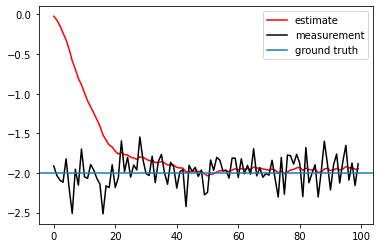

In [6]:
plt.figure()
plt.plot(x_hat, label = 'estimate', color = 'r')
plt.plot(z, label = 'measurement', color = 'k')
plt.axhline(y=x, label = 'ground truth')
plt.legend()
plt.show()